# TP 02 : Régression linéaire 


## I Régression linéaire à une seule variable 
Dans cette partie, on commence par implémenter la régression linéaire avec une seule variable de prédiction (predictor). Nous allons donc essayer de résoudre le fameux problème de prédiction du prix d'une maison en connaissant sa superficie. 

### I.1 Préparation des données

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

#### I.1.1 Lecture des données

In [2]:
header = ["Superficie", "Prix"]
houses = pd.read_csv("datasets/houses.csv", names=header)
houses.head()

,Superficie,Prix
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [3]:
houses.describe()

,Superficie,Prix
count,47.000000,47.000000
mean,2000.680851,340412.659574
std,794.702354,125039.899586
min,852.000000,169900.000000
25%,1432.000000,249900.000000
50%,1888.000000,299900.000000
75%,2269.000000,384450.000000
max,4478.000000,699900.000000


##### I.1.2 Normalisation 
La normalisation est la mise à echelle des valeurs des caractéristiques. Exemple simple de but : En calculant la distance euclidienne une des caracteristiques va avoir plus d'effet sur le résultat si ses valeurs sont beaucoup plus grandes que celle de l'autre variable. 

In [6]:
# Normalisation
# TODO: compléter la fonction qui applique le Z-score sur une matrice 
# La fonction doit retourner 3 résultats 
# 1: la matrice normalisée, 2: la moyenne, 3: la déviation standard 
def normalise(X): 
    mean = np.mean(X)
    std = np.std(X)
    return (X-mean)/std, mean, std


# Doit afficher: 
"""
(array([[-0.9166985 ,  0.1833397 ],
        [-0.9166985 ,  1.55838744],
        [-0.9166985 ,  1.00836835]]), 4.333333333333333, 3.636237371545238)
"""
normalise([[1., 5.], [1., 10.], [1., 8]])


(array([[-0.9166985 ,  0.1833397 ],
        [-0.9166985 ,  1.55838744],
        [-0.9166985 ,  1.00836835]]), 4.333333333333333, 3.636237371545238)

##### I.1.3 Fractionnement des données 
Ici, on va diviser les données en données de test et d'entrainnement 

On prend juste les 7 dernières ligne pour le  test 

In [7]:
# Extraction des caractéristiques 
def fractionner(df):
    X = df.iloc[:, :-1].values # Premières colonnes 
    Y = df.iloc[:,-1].values # Dernière colonne 
    
    # On définit la matrice X comme etant la supérficie concatenée à un vecteur de 1 
    # pour faciliter l'algorithme pour theta0 
    ones = np.ones([X.shape[0],1])
    X = np.concatenate((ones, X), axis=1)
    return X, Y

# Randomization des données pour marquer les 80% lignes
msk = np.random.rand(len(houses)) < 0.8 

X_train, Y_train = fractionner(houses[msk])
X_test, Y_test = fractionner(houses[~msk])

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((39, 2), (39,), (8, 2), (8,))

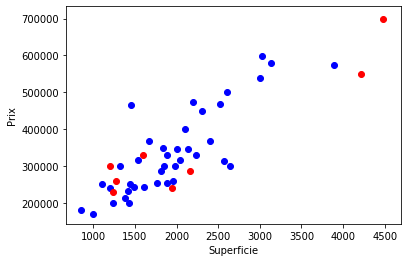

In [8]:
# Les données d'entrainnement en bleu
plt.scatter(X_train[:,1], Y_train, color="blue")
# Les données de test en rouge
plt.scatter(X_test[:,1], Y_test, color="red")
plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.show()

### I.2 Descente du gradient 

#### I.2.1 Définir les paramètres

In [9]:
# Définir les hyperparamétres : 
LEARNING_RATE = 0.01 
NB_ITER = 500

# TODO :  Initialiser aléatoirement les paramètres :
## theta est une liste contenant les deux paramètres theta0 et theta1 
theta = np.random.rand(X_train.shape[1])
# Affichage des paramètres initiales (5 premières lignes)
theta

array([0.0450974 , 0.05863293])

#### I.2.2 Définir les fonctions nécessaires pour la regression linéaire

In [10]:
# TODO: Prédire la valeur : 
def predire(X, theta):
    return np.dot(X, theta)

# tester la prédiction 
X_t = np.array([[1., 5.], [1., 10.], [1., 8]])
theta_t = np.array([0.25, 0.5])
# Le résulat doit être
"""
array([2.75, 5.25, 4.25])
"""
predire(X_t, theta_t)

array([2.75, 5.25, 4.25])

In [ ]:
# TODO: Définir la fonction de cout : 
def J(X, Y, theta):
    return None

# tester le cout 
#X_t = np.array([[1., 5.], [1., 10.], [1., 8]])
#theta_t = np.array([0.25, 0.5])
Y_t = np.array([3., 5., 4.5])
# Le résulat doit être ((3-2.75)^2 + (5-5.25)^2 + (4.5-4.25)^2))/6
"""
0.03125
"""
J(X_t, Y_t, theta_t)

In [ ]:
# TODO: Définir la fonction de gradient :
def gradient(X, Y, theta):
    return  None
# Tester le gradient, le résultat doit être
"""
array([-0.08333333, -0.25      ])
"""
gradient(X_t, Y_t, theta_t)

In [ ]:
def afficher_droite(X, Y, theta):
    plt.scatter(X[:,1], Y, color="blue")
    plt.plot(X[:,1], predire(X, theta), color="red")
    plt.show()
# tester avec X_t et Y_t
afficher_droite(X_t, Y_t, theta_t)

In [ ]:
# TODO : Définir la déscente du gradient
# Cette fonction doit afficher 
def gradient_descent(X, Y, theta, nb_iter, learning_rate, affich = True):
    #l'historique des couts
    couts = []
    # on recopie theta pour ne pas modifier celle en entrée
    theta1 = theta.copy()
    couts.append(J(X, Y, theta1))
    
    if (affich):
        afficher_droite(X, Y, theta1)
    
    # TODO Définir l'algorithme de la descente de gradient : 
    
        
    if(affich):
        afficher_droite(X, Y, theta1)

    return theta1, couts

# Tester la fonction
# array([0.25202765, 0.50363117])
# [0.03125, 0.030768749999999997, 0.030682227021604936])
gradient_descent(X_t, Y_t, theta_t, 3, LEARNING_RATE, affich=False)

#### I.2.3  Appliquer la descente sur nos données 
Lorsqu'on applique le code suivant, on aura un problème

**Question** : Quel est le problème ?
Régler le

**Réponse (Quel est le problème)** : 

In [ ]:
#TODO: avant d'appliquer le gradient, il faut faire un traitement 

theta_optimaux, couts = gradient_descent(X_train, Y_train, theta, NB_ITER, LEARNING_RATE)

print("Thetas optimaux : ", theta_optimaux)
print(couts[-1])


In [ ]:
plt.plot(couts)
plt.show()

**Question 1** : 

Pour cette exemple, quel est selon vous le nombre d'itérations nécessaires pour obtenir la convergence dans l'algorithme de la descente du gradient ? 


**Réponse 1** :


**Question2** : 

Modifier le code de la décente du gradient pour sortir de la boucle (avant que le nombre des itérations soit fini) lorsque l'erreur ne s'améliore plus. 

Pour ce faire, on calcul un taux de changement et on le compare avec un seuil de changement.

In [ ]:
# TODO : Définir la déscente du gradient
def gradient_descent2(X, Y, theta, nb_iter, learning_rate, affich = True, seuil=0.001):
    couts = []
    theta1 = theta.copy()
    couts.append(J(X, Y, theta1))
    
    if (affich):
        afficher_droite(X, Y, theta1)
    
    # TODO Définir l'algorithme de la descente de gradient : 
    
        
    if(affich):
        afficher_droite(X, Y, theta1)

    return theta1, couts

theta_optimaux, couts = gradient_descent2(X_train, Y_train, theta, NB_ITER, LEARNING_RATE, affich = False)
plt.plot(couts)
plt.show()

**Question 2 suite** : 
1. Donner le nombre des itérations nécessaire pour la convergence (à peu près)
1. Quel est l'intéret de fixer un nombre des itérations ?
1. Quel est l'intéret d'utiliser le taux d'amélioration ?

**Réponse 2** : 



**Question 3** : 

Essayer de changer les valeurs du learning_rate,
Afficher le graphe des coûts (J) par rapport aux différents learning_rate. 

- Que remarquez-vous ?


In [ ]:
# TODO : Tester plusieurs valeurs du learning_rate : 

#TODO iter_rate = 0.1
couts1 = []
#TODO iter_rate = 0.05
couts2 = []
#TODO iter_rate = 0.01
couts3 = []

# Affichage du graphe des coûts par rapport aux learning_rate :

plt.plot(couts1, label = "0.1")
plt.plot(couts2, label = "0.05")
plt.plot(couts3, label = "0.01")
plt.legend()
#plt.autoscale()
plt.show()

**Réponse 3** : 

**Question 4** : 

Appliquer la décente du gradient sur les 3 initialisations des paramètres (thetas) : 

- Initialisation aléatoire 
- Initialisation à zero 
- Initialisation à un 

Est-ce que l'initialisation des paramètres affecte la convergence ?


In [ ]:
# TODO Initialisation aléatoire 
couts1 = []

# TODO Initialisation à zero 
couts2 = []

# TODO Initialisation à un 
couts3 = []

# Affichage du graphe des coûts par rapport aux learning_rate :

plt.plot(couts1, label = "Aleatoire")
plt.plot(couts2, label = "zeroes")
plt.plot(couts3, label = "uns")
plt.legend()
#plt.autoscale()
plt.show()

**Réponse 4** : 

- [ ] OUI 
- [ ] NON

## II Régression Polynomiale 

Dans cette partie, on essaye d'appliquer une régression polynomiale.  

## II.1 Régression Linéaire (pour comparaison) 

In [ ]:
# TODO initialiser theta
theta1 = None

#Application de la régression linéaire 
theta1 , couts1 = gradient_descent(X_train, Y_train, theta1, NB_ITER, LEARNING_RATE, affich=False)

X_train[:3, :]

## II.2 Régression Polynomiale (degré 2)

In [ ]:
#TODO créer des données similaires à X_train mais avec une colonne X^2
X_train2 = None

# TODO initialiser theta
theta2 = None

#Application de la régression linéaire 
theta2 , couts2 = gradient_descent(X_train2, Y_train, theta2, NB_ITER, LEARNING_RATE, affich=False)

X_train2[:3, :]

## II.3 Régression Plynomiale (degré 3)

In [ ]:
#TODO créer des données similaires à X_train2 mais avec une colonne X^3
X_train3 = None

# TODO initialiser theta
theta3 = None

#Application de la régression linéaire 
theta3 , couts3 = gradient_descent(X_train3, Y_train, theta3, NB_ITER, LEARNING_RATE, affich=False)

X_train3[:3, :]

## II.4 Comparaison des évolutions des coûts


In [ ]:
# Affichage du graphe des coûts par rapport aux degré des polynomes :

plt.plot(couts1, label = "a X + b")
plt.plot(couts2, label = "a X + b X^2 + c")
plt.plot(couts3, label = "a X + b X^2 + c X^3 + d")
plt.legend()
#plt.autoscale()
plt.show()

**Question** : Que remarquez-vous ?

**Réponse** : 


## II.5 Comparaison des estimateurs 

In [ ]:
# Affichage des estimations :

plt.scatter(X_train[:,1], Y_train, color="blue")
plt.plot(X_train[:,1], predire(X_train, theta1), label = "a X + b", color="red")
plt.plot(X_train[:,1], predire(X_train2, theta2), label = "a X + b X^2 + c", color="green")
plt.plot(X_train[:,1], predire(X_train3, theta3), label = "a X + b X^2 + c X^3 + d", color="orange")
plt.legend()
#plt.autoscale()
plt.show()

Le problème avec le graphe est que les données doivent être ordonnées selon la superficie

In [ ]:
# Trouver les indexes ordonnées 
idx = X_train[:,1].argsort()

X_train = X_train[idx]
X_train2 = X_train2[idx]
X_train3 = X_train3[idx]
Y_train = Y_train[idx] #pas besoin de ça, mais pour avoir les Y alignés avec les X

plt.scatter(X_train[:,1], Y_train, color="blue")
plt.plot(X_train[:,1], predire(X_train, theta1), label = "a X + b", color="red")
plt.plot(X_train[:,1], predire(X_train2, theta2), label = "a X + b X^2 + c", color="green")
plt.plot(X_train[:,1], predire(X_train3, theta3), label = "a X + b X^2 + c X^3 + d", color="orange")
plt.legend()
#plt.autoscale()
plt.show()


## II.6 Test des modèles (Performance)

Ici, on va tester les modèles : theta1, theta2 et theta3 sur (X_test, Y_test) afin de décider le meilleur modèle dans le cas de prédidication des prix des maisons en utilisant la surface. 

Pour ce faire, on utilise **Root Mean Squared Error (RMSE)**. Notre fonction de cout est, en réalité, **Mean Squared Error (RMSE)**. Donc, il suffit d'appliquer la racine carrée

In [ ]:
# TODO tester les trois modèles en utilisant la fonction 

erreur1 = None
erreur2 = None
erreur3 = None

erreur1, erreur2, erreur3


**Question** : Quel est le meilleur modèle selon la métrique et les données utilisées ?

**Réponse** : 

# III Régression lineaire avec scikit-learn 


On poursuit avec les données des prix maisons : 

## III.1 Préparation des données

In [ ]:
# Diviser les données 
from sklearn.model_selection import train_test_split  
X = houses.iloc[:, :-1].values # Premières colonnes 
Y = houses.iloc[:,-1].values # Dernière colonne 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  

## III.2 Régression linéaire

In [ ]:
# Entraîner le modèle 
from sklearn.linear_model import LinearRegression  
regressor1 = LinearRegression(normalize=True)  
regressor1.fit(X_train, Y_train)  

In [ ]:
# Le coefficient des constantes
print(regressor1.intercept_)  

In [ ]:
# Les coéfficients des variables (caractéristiques)
print(regressor1.coef_)  

In [ ]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X, regressor1.predict(X), color="red")
plt.show()

In [ ]:
# Prédire les valeurs du X_test 
y_pred = regressor.predict(X_test)  

plt.scatter(X_train, y_train, color="blue")
plt.scatter(X_test, y_test, color="green")
plt.plot(X, regressor.predict(X), color="red")
plt.scatter(X_test, y_pred, color="violet")
plt.show()

## III.3 Régression polynomiale

La régression polynomiale est un cas spécial de la régression linéaire. On peut créer de nouvelles caractéristiques dans l'étape de préparation des données en multipliant les valeurs des anciennes caractéristiques. 

### III.3.1 Créer des nouvelles caractéristiques


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2, include_bias=False)

X_train2 = poly2.fit_transform(X_train)
X_test2 = poly2.fit_transform(X_test)

X_train2[:3, :]

In [ ]:
poly10 = PolynomialFeatures(degree=10, include_bias=False)

X_train10 = poly10.fit_transform(X_train)
X_test10 = poly10.fit_transform(X_test)

X_train10[:3, :]

### III.3.2 Entrainer les deux modèles

In [ ]:
# Regrésseur polynomial de degré 2
regressor2 = LinearRegression(normalize=True)  
regressor2.fit(X_train2, y_train)

# Regrésseur polynomial de degré 10
regressor10 = LinearRegression(normalize=True)  
regressor10.fit(X_train10, y_train)

## III.5 Evaluation des modèles 


In [ ]:
Y_pred1 = regressor1.predict(X_test)
Y_pred2 = regressor2.predict(X_test2)
Y_pred10 = regressor10.predict(X_test10)

### III.5.1 Explained variance score

$$explained\_variance(y, ŷ) = 1 - \frac{Var(y - ŷ)}{Var(y)}$$

In [ ]:
from sklearn.metrics import  explained_variance_score

erreur1 = explained_variance_score(Y_test, Y_pred1)
erreur2 = explained_variance_score(Y_test, Y_pred2)
erreur10 = explained_variance_score(Y_test, Y_pred10)

erreur1, erreur2, erreur10

### III.5.2 Mean squared error

$$MSE(y, ŷ) = \frac{1}{nbr\_echantillons} \sum\limits_{i=0}^{nbr\_echantillons - 1} (y - ŷ)^2$$

In [ ]:
from sklearn.metrics import mean_squared_error

erreur1 = mean_squared_error(Y_test, Y_pred1)
erreur2 = mean_squared_error(Y_test, Y_pred2)
erreur10 = mean_squared_error(Y_test, Y_pred10)

erreur1, erreur2, erreur10

### III.5.3 Mean absolute error

$$MAE(y, ŷ) = \frac{1}{nbr\_echantillons} \sum\limits_{i=0}^{nbr\_echantillons - 1} |y - ŷ|$$

In [ ]:
from sklearn.metrics import mean_absolute_error

erreur1 = mean_absolute_error(Y_test, Y_pred1)
erreur2 = mean_absolute_error(Y_test, Y_pred2)
erreur10 = mean_absolute_error(Y_test, Y_pred10)

erreur1, erreur2, erreur10

### III.5.4 Autres

Consulter https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

## III.6 Persistance des modèles 

Après avoir entrainé un modèle, il est souhaitable de le conserver pour un usage ultérieur sans avoir besoin d'entrainer une deuxième fois. Il y a deux façons de le faire selon la doc de scikit-learn (https://scikit-learn.org/stable/modules/model_persistence.html)

- la sérialisation pickle
- la sérialisation joblib

La deuxième est recommandée par scikit-learn. Après avoir entrainer notre modèle, on le sauvegarde.

In [ ]:
from joblib import dump, load

# Pour sauvegarder le modèle
dump(regressor1, "mon_modele.joblib")

# Pour Récupérer le modèle
regressor_past = load("mon_modele.joblib")